In [3]:
pip install scikit-fuzzy

  Obtaining dependency information for scikit-fuzzy from https://files.pythonhosted.org/packages/9d/06/da70811f95c4a3bada55e7b20c957548a4d9bc21150916f0c024286d67c7/scikit_fuzzy-0.5.0-py2.py3-none-any.whl.metadata
  Using cached scikit_fuzzy-0.5.0-py2.py3-none-any.whl.metadata (2.6 kB)
Using cached scikit_fuzzy-0.5.0-py2.py3-none-any.whl (920 kB)
Note: you may need to restart the kernel to use updated packages.


Error: Please enter a value between 0 and 50.
Error: Please enter a value between 0 and 50.

Recommended Sprinkling Level: 44.35%
Decision: Water moderately for balanced soil moisture.


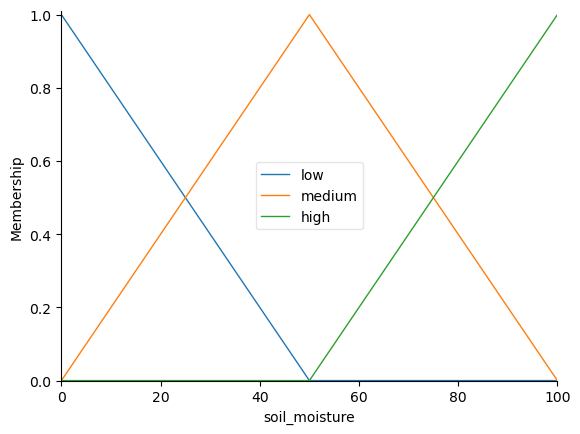

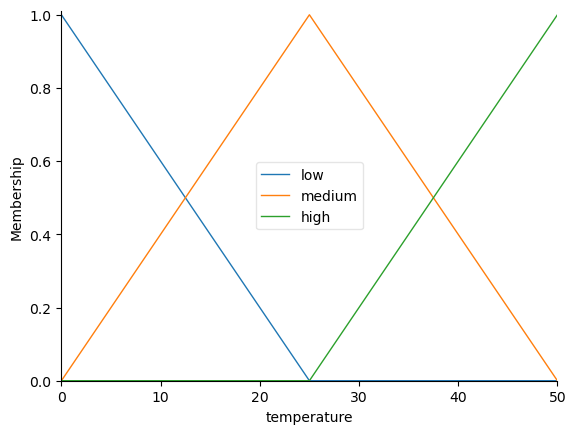

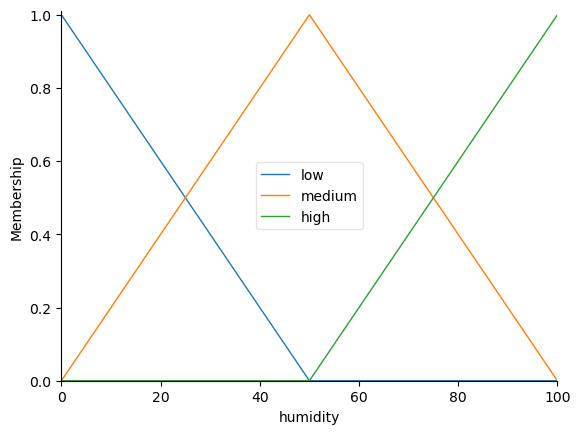

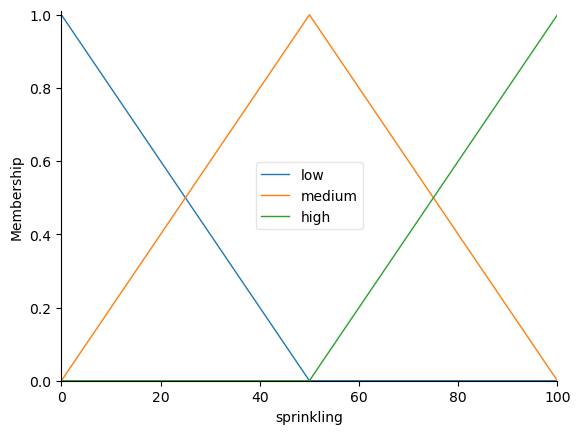

In [6]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt

def get_valid_input(prompt, min_value, max_value):
    """
    Function to get valid user input within a specific range.
    It will keep asking until a correct value is entered.
    """
    while True:
        try:
            value = float(input(f"{prompt} ({min_value}-{max_value}): "))
            if min_value <= value <= max_value:
                return value
            else:
                print(f"Error: Please enter a value between {min_value} and {max_value}.")
        except ValueError:
            print("Error: Invalid input. Please enter a numerical value.")

# Define fuzzy variables
soil_moisture = ctrl.Antecedent(np.arange(0, 101, 1), 'soil_moisture')
temperature = ctrl.Antecedent(np.arange(0, 51, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
sprinkling = ctrl.Consequent(np.arange(0, 101, 1), 'sprinkling')

# Membership functions
types = ['low', 'medium', 'high']
soil_moisture.automf(names=types)
temperature.automf(names=types)
humidity.automf(names=types)
sprinkling.automf(names=types)

# Define fuzzy rules
rule1 = ctrl.Rule(soil_moisture['low'] | temperature['high'] | humidity['low'], sprinkling['high'])
rule2 = ctrl.Rule(soil_moisture['medium'] & temperature['medium'], sprinkling['medium'])
rule3 = ctrl.Rule(soil_moisture['high'] | temperature['low'] | humidity['high'], sprinkling['low'])

# Create control system and simulation
sprinkling_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
sprinkling_simulation = ctrl.ControlSystemSimulation(sprinkling_ctrl)

# Get valid inputs from the user
soil_value = get_valid_input("Enter soil moisture percentage", 0, 100)
temp_value = get_valid_input("Enter temperature in Celsius", 0, 50)
humidity_value = get_valid_input("Enter humidity percentage", 0, 100)

# Set input values
sprinkling_simulation.input['soil_moisture'] = soil_value
sprinkling_simulation.input['temperature'] = temp_value
sprinkling_simulation.input['humidity'] = humidity_value

# Compute the output
sprinkling_simulation.compute()
output_sprinkling = sprinkling_simulation.output['sprinkling']

# Display output
def get_recommendation(value):
    if value > 70:
        return "Water heavily to prevent dryness."
    elif value > 40:
        return "Water moderately for balanced soil moisture."
    else:
        return "Minimal or no watering needed. Soil is sufficiently moist."

recommendation = get_recommendation(output_sprinkling)
print(f"\nRecommended Sprinkling Level: {output_sprinkling:.2f}%")
print(f"Decision: {recommendation}")

# Plot membership functions
soil_moisture.view()
temperature.view()
humidity.view()
sprinkling.view()
plt.show()
